# Random Forest

In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score)

# Configurar estilo de gráficos
%matplotlib inline
sns.set(style='whitegrid')

Esta vez, utilizaremos un conjunto mas complejo que el clasico de las flores. Utilizaremos datos de vino

In [5]:
# Cargar el conjunto de datos Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [7]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [13]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


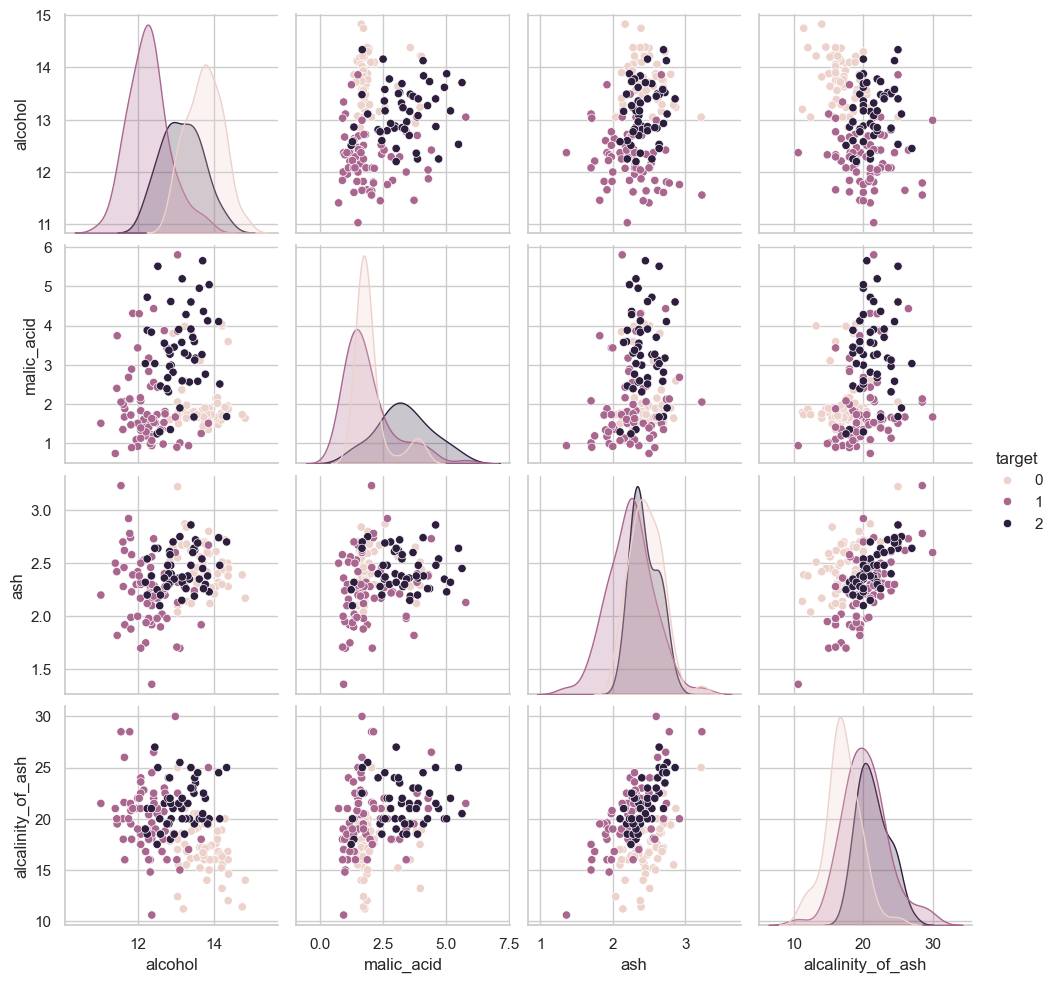

In [21]:
# Visualización de pares de características
sns.pairplot(df, hue='target', vars=feature_names[:4])
plt.show()


In [50]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=22, stratify=y)


# Prueba de árbol

In [52]:
dt_clf = DecisionTreeClassifier(random_state=22)
dt_clf

DecisionTreeClassifier(random_state=22)

In [54]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=22)

In [58]:
# Evaluación del árbol de decisión
y_pred_dt = dt_clf.predict(X_test)
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_dt))

Precisión del Árbol de Decisión: 0.9259259259259259


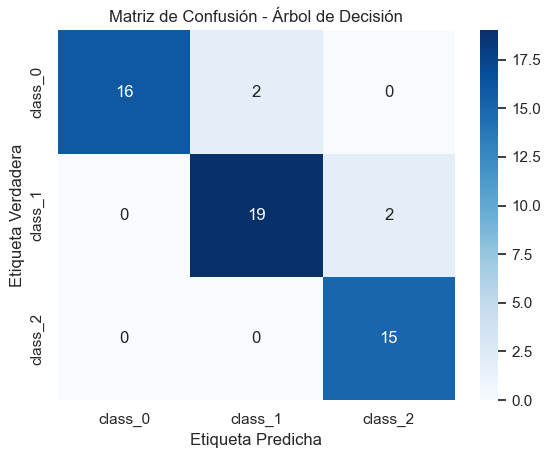

In [60]:
# Matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


# Random Forest

In [71]:
rf_clf = RandomForestClassifier(
    n_estimators=100,    # Número de árboles en el bosque
    max_features='sqrt', # Número de características a considerar en cada división
    random_state=22
)

rf_clf

RandomForestClassifier(random_state=22)

In [73]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=22)

In [74]:
# Evaluación del Random Forest
y_pred_rf = rf_clf.predict(X_test)
print("Precisión del Random Forest:", accuracy_score(y_test, y_pred_rf))


Precisión del Random Forest: 0.9814814814814815


Precisión del Árbol de Decisión: 0.9259259259259259

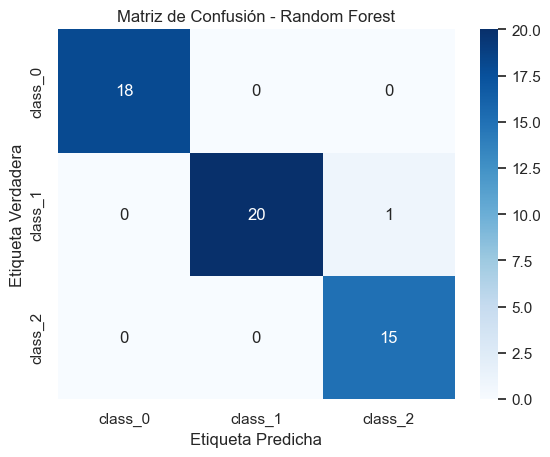

In [78]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


                         Feature  Importance
12                       proline    0.183675
6                     flavanoids    0.170954
11  od280/od315_of_diluted_wines    0.136060
0                        alcohol    0.133321
9                color_intensity    0.130791
10                           hue    0.081760
5                  total_phenols    0.036882
3              alcalinity_of_ash    0.034643
8                proanthocyanins    0.027928
4                      magnesium    0.024762
1                     malic_acid    0.015285
7           nonflavanoid_phenols    0.012174
2                            ash    0.011762


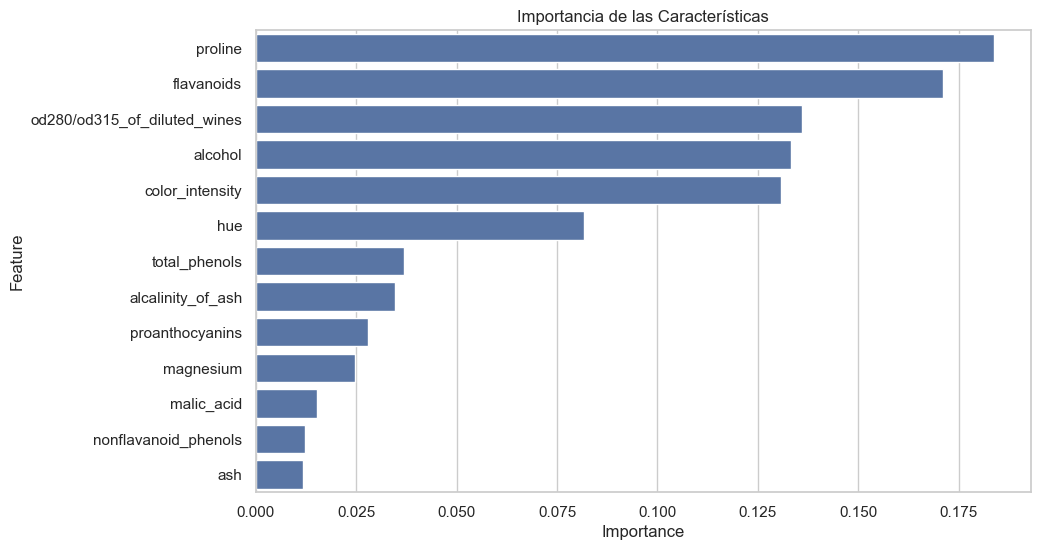

In [46]:
# Importancia de las características en el Random Forest
importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)

# Visualización de la importancia
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Importancia de las Características')
plt.show()
